In [54]:
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [78]:
df = pd.read_pickle("/Volumes/onishlab_shared/PROJECTS/30_Andrew/03_IMAGING_DATABASE/IMDB.pkl")
data = df.loc[:, ["feed", "array_vals"]].values
np.random.shuffle(data)
X = data[:, 1]
T = data[:, 0]
X = np.stack(X)

In [235]:
data.tofile("./data.csv")

OSError: cannot write object arrays to a file in binary mode

In [79]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [80]:
# Target Dictionary 
target_dict = {
    "JUB66_RFP": 0,
    "JUB66_RFP_IN_CEMBIO": 1,
    "MK_JUB66_RFP_IN_JUB66": 2
}

In [81]:
T = np.vectorize(target_dict.get)(T)
T = T.reshape(-1, 1)

In [82]:
Xtrain = X[:int(len(X) * 0.8)]
Xtest = X[int(len(X) * 0.8):]
Ttrain = T[:int(len(T) * 0.8)]
Ttest = T[int(len(T) * 0.8):]

In [83]:
Ttrain = Ttrain.reshape((-1, 1))
Ttest = Ttest.reshape((-1, 1))

In [84]:
from Reg_NeuralNet import NeuralNetwork

In [222]:
nn = NeuralNetwork(3500, [50, 10, 2, 10], [0,1,2])

In [225]:
def test_partitions(Xtrain, Ttrain, n_partitions, nn: NeuralNetwork, epochs, learning_rate):
    length = Xtrain.shape[0]

    for _ in range(n_partitions):
        indices = np.random.permutation(length)

        X_shuffle = Xtrain[indices]
        T_shuffle = Ttrain[indices]

        X_train = X_shuffle[:int(length * 0.50)]
        T_train = T_shuffle[:int(length * 0.50)]

        nn.train(X_train, T_train, epochs, learning_rate)

    return nn


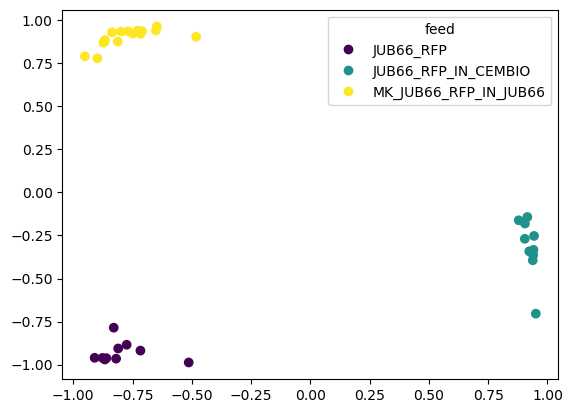

In [232]:
nn = test_partitions(Xtrain, Ttrain, 50, nn, 60, 0.0005)

In [233]:
nn.mse_trace[-1]

0.010113522276128504

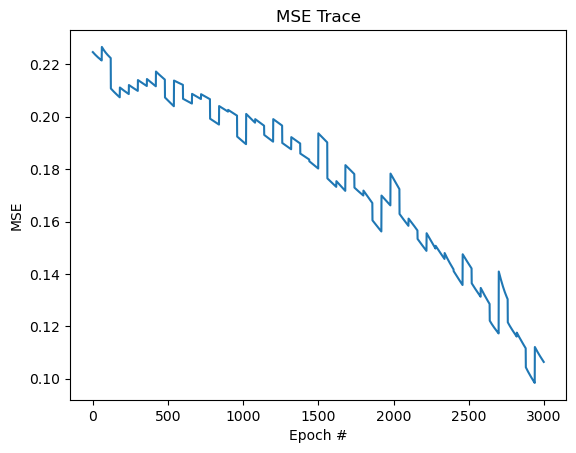

In [228]:
nn.plot_mse_trace()

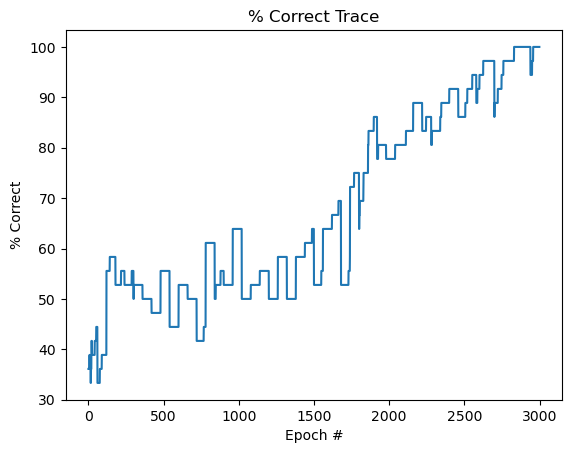

In [229]:
nn.plot_percent_correct_trace()

In [230]:
Y = nn.use(Xtest)[0]
nn.percent_correct(Y, Ttest)

44.44444444444444

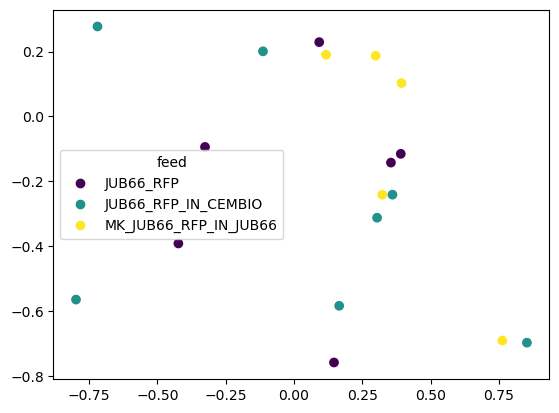

In [231]:
scatter = plt.scatter(nn.Hs[2][:,0], nn.Hs[2][:,1], c=Ttest[:,0])
plt.legend(handles=scatter.legend_elements()[0], 
           title="feed", labels=target_dict.keys());